<a href="https://colab.research.google.com/github/AliMamaghani1999/DeepLearning-HW2/blob/main/HW2_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Part-A

In [3]:
df_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data2/HW2_data/Q3_train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data2/HW2_data/Q3_test.csv')

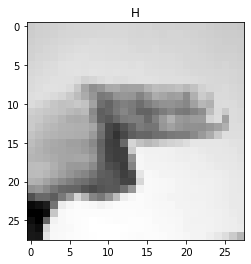

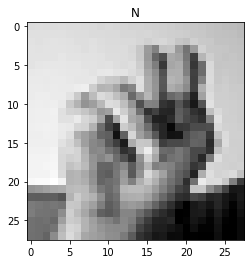

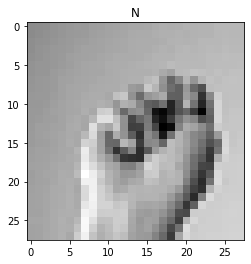

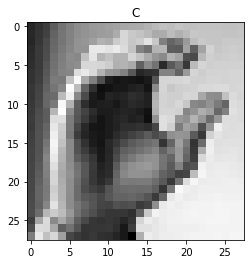

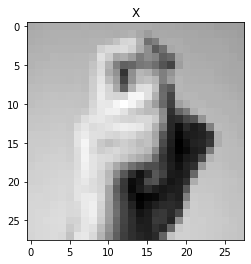

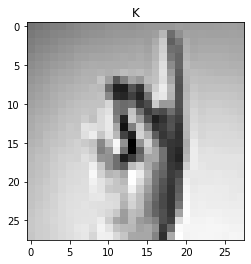

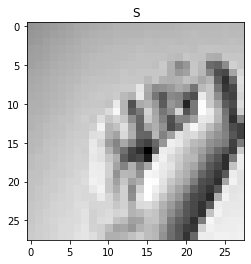

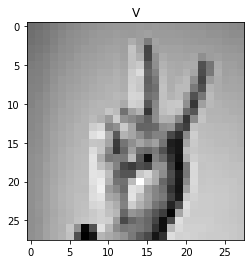

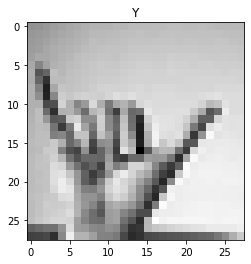

In [8]:
y_train=df_train['label']
X_train=(df_train.to_numpy())[:,1:]
X_train_img=X_train.reshape(X_train.shape[0],28,28)
A=np.random.choice(range(0,X_train.shape[0]),9)
for i in A:
  plt.imshow(X_train_img[i],cmap='gray')
  title=chr(65+y_train[i])
  plt.title(title)
  plt.show()

#Part-B

In [9]:
import torch
import torch.nn as nn

In [49]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 25),
            #nn.Softmax(dim=1),
        )

    def forward(self, x):
        
        y = self.linear_relu_stack(x)
        return y

In [50]:
model=NeuralNetwork()

In [51]:
y_tr_ten1=torch.tensor(y_train.values)
X_tr_ten1=torch.tensor(X_train)
y_te_ten=torch.tensor(df_test['label'].values)
X_te_ten=torch.tensor((df_test.to_numpy())[:,1:])
y_tr_ten=y_tr_ten1[0:int(0.8*y_tr_ten1.shape[0])]
X_tr_ten=X_tr_ten1[0:int(0.8*X_tr_ten1.shape[0])]

y_val_ten=y_tr_ten1[int(0.8*y_tr_ten1.shape[0]):]
X_val_ten=X_tr_ten1[int(0.8*X_tr_ten1.shape[0]):]

data_train=[]
data_test=[]
data_val=[]
for i in range(y_tr_ten.shape[0]):
  data_train.append((X_tr_ten[i],y_tr_ten[i]))
for i in range(y_te_ten.shape[0]):
  data_test.append((X_te_ten[i],y_te_ten[i]))
for i in range(y_val_ten.shape[0]):
  data_val.append((X_val_ten[i],y_val_ten[i]))

In [52]:
learning_rate = 1e-4
batch_size = 32
epochs = 50

In [53]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(data_train, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(data_test, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(data_val, batch_size=batch_size, shuffle=True)

In [54]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [55]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        
        pred = model(X.to(torch.float32))
        loss = loss_fn(pred, y.to(dtype=torch.int64))

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def val_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X.to(torch.float32))
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Validation Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X.to(torch.float32))
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

##SGD

In [56]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    val_loop(val_dataloader, model, loss_fn)

Epoch 1
-------------------------------
loss: 11.146954  [    0/21964]
loss: 2.907536  [ 3200/21964]
loss: 2.701724  [ 6400/21964]
loss: 2.717857  [ 9600/21964]
loss: 1.957441  [12800/21964]
loss: 1.842250  [16000/21964]
loss: 2.227064  [19200/21964]
Validation Error: 
 Accuracy: 35.7%, Avg loss: 2.114385 

Epoch 2
-------------------------------
loss: 1.894708  [    0/21964]
loss: 1.719571  [ 3200/21964]
loss: 1.504946  [ 6400/21964]
loss: 1.336162  [ 9600/21964]
loss: 1.963085  [12800/21964]
loss: 1.265924  [16000/21964]
loss: 1.028705  [19200/21964]
Validation Error: 
 Accuracy: 51.6%, Avg loss: 1.504826 

Epoch 3
-------------------------------
loss: 1.522035  [    0/21964]
loss: 1.187967  [ 3200/21964]
loss: 1.292198  [ 6400/21964]
loss: 1.481608  [ 9600/21964]
loss: 1.264312  [12800/21964]
loss: 0.923228  [16000/21964]
loss: 1.127784  [19200/21964]
Validation Error: 
 Accuracy: 66.5%, Avg loss: 1.129663 

Epoch 4
-------------------------------
loss: 0.896646  [    0/21964]
loss:

In [57]:
test_loop(test_dataloader, model, loss_fn)

Test Error: 
 Accuracy: 75.0%, Avg loss: 0.968143 



## ADAM

In [58]:
model=NeuralNetwork()

In [59]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [60]:
learning_rate = 1e-4
batch_size = 32
epochs = 50

In [61]:
for t in range(50):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    val_loop(val_dataloader, model, loss_fn)

Epoch 1
-------------------------------
loss: 14.594870  [    0/21964]
loss: 2.766544  [ 3200/21964]
loss: 1.768256  [ 6400/21964]
loss: 1.831827  [ 9600/21964]
loss: 1.556277  [12800/21964]
loss: 1.129521  [16000/21964]
loss: 1.228688  [19200/21964]
Validation Error: 
 Accuracy: 65.8%, Avg loss: 1.126587 

Epoch 2
-------------------------------
loss: 0.980195  [    0/21964]
loss: 1.020646  [ 3200/21964]
loss: 0.796716  [ 6400/21964]
loss: 0.867920  [ 9600/21964]
loss: 0.535941  [12800/21964]
loss: 0.801284  [16000/21964]
loss: 0.376385  [19200/21964]
Validation Error: 
 Accuracy: 86.2%, Avg loss: 0.466340 

Epoch 3
-------------------------------
loss: 0.393620  [    0/21964]
loss: 0.476193  [ 3200/21964]
loss: 0.368131  [ 6400/21964]
loss: 0.489405  [ 9600/21964]
loss: 0.295301  [12800/21964]
loss: 0.298832  [16000/21964]
loss: 0.223761  [19200/21964]
Validation Error: 
 Accuracy: 92.5%, Avg loss: 0.241755 

Epoch 4
-------------------------------
loss: 0.122266  [    0/21964]
loss:

In [62]:
test_loop(test_dataloader, model, loss_fn)

Test Error: 
 Accuracy: 83.7%, Avg loss: 0.858067 



SGD produces the same performance as regular gradient descent when the learning rate is low. Adam's optimization method computes individual adaptive learning rates for different parameters from estimates of the first and second moments of the gradients. In this problem and for 50 epochs adams works better.

# Part-C

In [63]:
import torch
import torch.nn as nn

In [121]:
class NeuralNetwork1(nn.Module):
    def __init__(self):
        super(NeuralNetwork1, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 25),
            #nn.Softmax(dim=1),
        )

    def forward(self, x):
        
        y = self.linear_relu_stack(x)
        return y

In [122]:
model1=NeuralNetwork1()

In [123]:
learning_rate = 1e-4
batch_size = 32
epochs = 90

In [124]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=learning_rate)

In [125]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    model1.train()
    train_loop(train_dataloader, model1, loss_fn, optimizer)
    model1.eval()
    val_loop(val_dataloader, model1, loss_fn)
    test_loop(test_dataloader, model1, loss_fn)

Epoch 1
-------------------------------
loss: 13.655018  [    0/21964]
loss: 3.343660  [ 3200/21964]
loss: 2.910502  [ 6400/21964]
loss: 2.899224  [ 9600/21964]
loss: 2.583499  [12800/21964]
loss: 2.408451  [16000/21964]
loss: 2.246393  [19200/21964]
Validation Error: 
 Accuracy: 42.5%, Avg loss: 1.863607 

Test Error: 
 Accuracy: 38.9%, Avg loss: 1.966256 

Epoch 2
-------------------------------
loss: 2.076384  [    0/21964]
loss: 1.924996  [ 3200/21964]
loss: 1.720237  [ 6400/21964]
loss: 2.255253  [ 9600/21964]
loss: 1.940374  [12800/21964]
loss: 1.723075  [16000/21964]
loss: 1.286717  [19200/21964]
Validation Error: 
 Accuracy: 61.2%, Avg loss: 1.246786 

Test Error: 
 Accuracy: 53.7%, Avg loss: 1.452690 

Epoch 3
-------------------------------
loss: 1.277612  [    0/21964]
loss: 1.455007  [ 3200/21964]
loss: 1.670165  [ 6400/21964]
loss: 1.581628  [ 9600/21964]
loss: 1.828979  [12800/21964]
loss: 1.435798  [16000/21964]
loss: 1.314486  [19200/21964]
Validation Error: 
 Accuracy:

In [126]:
model1.train()
train_loop(train_dataloader, model1, loss_fn, optimizer)
model1.eval()
val_loop(val_dataloader, model1, loss_fn)

loss: 0.291452  [    0/21964]
loss: 0.116551  [ 3200/21964]
loss: 0.108110  [ 6400/21964]
loss: 0.259382  [ 9600/21964]
loss: 0.057539  [12800/21964]
loss: 0.115447  [16000/21964]
loss: 0.196665  [19200/21964]
Validation Error: 
 Accuracy: 99.9%, Avg loss: 0.011726 



In [127]:
test_loop(test_dataloader, model1, loss_fn)

Test Error: 
 Accuracy: 84.0%, Avg loss: 0.702695 



In my case drop out is similar to adam. Nural Networks with adam converges slower. for training and test the results of both are similar.

#Part-D

Test acc=84 <br>
p_dropout=0.3 <br>
L_0: (28*28 -> 512) <br>
L_1: (512 -> 256) <br>
L_2: (256 -> 128) <br>
L_3: (128 -> 25) <br>
activation function: ReLU


#Part-E(Bonus)

In [150]:
from PIL import Image
import numpy as np

In [185]:
import imageio as iio

In [186]:
img1 = iio.imread("/content/drive/MyDrive/Colab Notebooks/Data2/HW2_data/file1.jpeg")
img2 = iio.imread("/content/drive/MyDrive/Colab Notebooks/Data2/HW2_data/file2.jpeg")
img3 = iio.imread("/content/drive/MyDrive/Colab Notebooks/Data2/HW2_data/file3.jpeg")

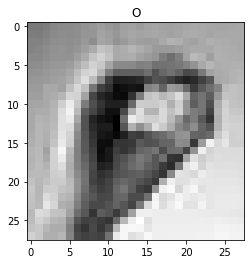

In [202]:
pred = model1(torch.tensor(img1,dtype=torch.float32).flatten())
plt.imshow(img1,cmap='gray')
title=chr(65+pred.argmax())
plt.title(title)
plt.show()

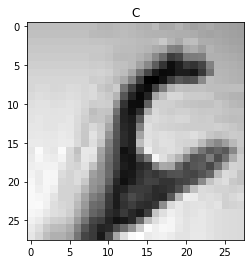

In [203]:
pred = model1(torch.tensor(img2,dtype=torch.float32).flatten())
plt.imshow(img2,cmap='gray')
title=chr(65+pred.argmax())
plt.title(title)
plt.show()

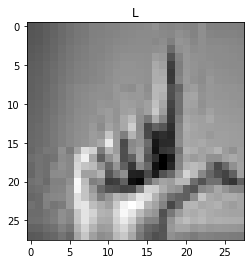

In [204]:
pred = model1(torch.tensor(img3,dtype=torch.float32).flatten())
plt.imshow(img3,cmap='gray')
title=chr(65+pred.argmax())
plt.title(title)
plt.show()

Deep Learning works!